In [ ]:
!pip install gdal
!pip install rasterio
!pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 36.2 MB/s 


**TIFFFILE**

In [ ]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
img = tiff.imread('/content/Imagens/L71221071_07120010720_DN.tif')

In [ ]:
img.shape

(1233, 1520, 6)

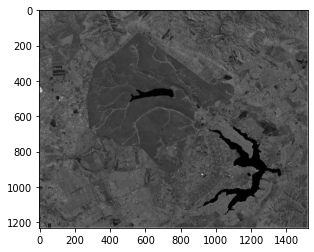

In [ ]:
plt.imshow(img[:,:,3], cmap= 'Greys_r')

In [ ]:
from spectral import imshow

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [13.0, 255.0]
    B: [40.0, 255.0]

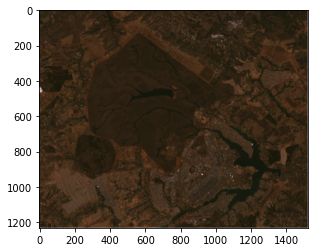

In [ ]:
imshow (img, bands=(2,1,0))

**GDAL**

In [ ]:
from osgeo import gdal

In [ ]:
img2= gdal.Open ("/content/Imagens/L71221071_07120010720_DN.tif")

In [ ]:
print (img2)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fbd3080de10> >


In [ ]:
img3=img2.ReadAsArray()

In [ ]:
img3=img3.swapaxes (0,2)

In [ ]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [12.0, 255.0]
    G: [12.0, 255.0]
    B: [12.0, 255.0]

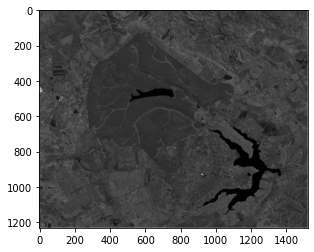

In [ ]:
imshow(img3[:,:,3])

ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [13.0, 255.0]

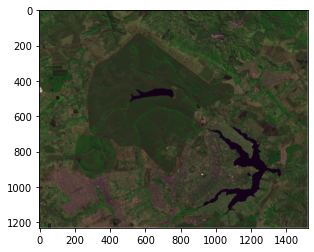

In [ ]:
imshow(img3, (2,3,1)) 

In [ ]:
b1=img2.GetRasterBand(1).ReadAsArray()
b2=img2.GetRasterBand(2).ReadAsArray()
b3=img2.GetRasterBand(3).ReadAsArray()

In [ ]:
stack=np.dstack([b1,b2,b3])

In [ ]:
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [13.0, 255.0]
    B: [40.0, 255.0]

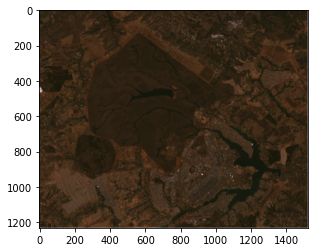

In [ ]:
imshow(stack,(2,1,0))

**RASTERIO**

In [ ]:
import rasterio

In [ ]:
rst=rasterio.open('/content/Imagens/L71221071_07120010720_DN.tif')

In [ ]:
from rasterio. plot import show

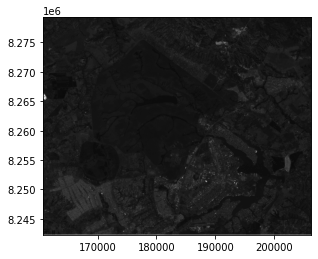

In [ ]:
show(rst,cmap='Greys_r')

In [ ]:
b1= rst.read (1)
b2= rst.read (2)
b3= rst.read (3)

In [ ]:
stack = np.dstack([b1,b2,b3])

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [13.0, 255.0]
    B: [40.0, 255.0]

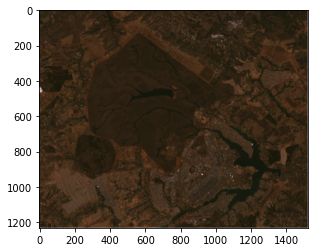

In [ ]:
imshow (stack, (2,1,0))